# Group Analysis

In [2]:
# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import scipy
from scipy import stats
from scipy import signal
from scipy.signal import spectrogram, butter, filtfilt, freqz
from scipy.signal.windows import hann
import statsmodels

import seaborn as sns
import pingouin as pg
from itertools import combinations
#from statannotations.Annotator import Annotator

import openpyxl
from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv
import fooof
from fooof.plts.spectra import plot_spectrum

#mne
import mne
from mne.time_frequency import tfr_morlet 

# xdf
import pyxdf
import pyxdftools
from pyxdftools import XdfData

import datetime

/var/folders/8d/3m_ljz890_j62q7hb7mpzdc40000gn/T/ipykernel_34800/1790677199.py:33: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  import fooof


In [46]:
jennifer_user_path = os.getcwd()
while jennifer_user_path[-14:] != 'jenniferbehnke':
    jennifer_user_path = os.path.dirname(jennifer_user_path)

# directory to this Repository
project_path = os.path.join(jennifer_user_path, 'code', 'Patterned_stimulation_project', 'patterned_DBS')
sys.path.append(project_path)

os.chdir(project_path)

# patterned DBS
import src.patterned_DBS.beta_suppression_latency.patterned_dbs_pilot as pilot
import src.patterned_DBS.beta_suppression_latency.patterned_find_dbs_OFF_moment as find_dbs_OFF_moment

# data processing
import src.patterned_DBS.data_processing.updrs_analysis as updrs_analysis
import src.patterned_DBS.data_processing.gait_analysis as gait_analysis
import src.patterned_DBS.data_processing.case_sub084 as case_sub084


# utility functions
import src.patterned_DBS.utils.io as io
import src.patterned_DBS.utils.find_folders as find_folders
import src.patterned_DBS.utils.lfp_preprocessing as lfp_preprocessing
import src.patterned_DBS.utils.xdf_structure as xdf_structure

importlib.reload(pilot)
importlib.reload(find_dbs_OFF_moment)
importlib.reload(io)
importlib.reload(find_folders)
importlib.reload(lfp_preprocessing)
importlib.reload(xdf_structure)
importlib.reload(updrs_analysis)
importlib.reload(gait_analysis)
importlib.reload(case_sub084)

<module 'src.patterned_DBS.data_processing.case_sub084' from '/Users/jenniferbehnke/code/Patterned_stimulation_project/patterned_DBS/src/patterned_DBS/data_processing/case_sub084.py'>

In [7]:
pd.set_option('display.max_rows', None)

## Load UPDRS Scores

In [162]:
updrs = io.load_metadata_excel(
    sub="080",
    sheet_name="updrs",    
)

Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080


In [163]:
updrs.columns

Index(['Subject', 'Project_ID', 'Medication', 'Stimulation', 'UPDRS_done?',
       'BS_Streaming', 'Comments', 'Date (y-m-d)', 'UPDRS_III',
       'subscore_tremor_right', 'subscore_tremor_left',
       'subscore_tremor_total', 'subscore_rigidity_right',
       'subscore_rigidity_left', 'subscore_rigidity_total',
       'subscore_bradykinesia_right', 'subscore_bradykinesia_left',
       'subscore_bradykinesia_total', 'Speech', 'Facial expression',
       'Rigidity (head)', 'Rigidity (RUE)', 'Rigidity (LUE)', 'Rigidity (RLE)',
       'Rigidity (LLE)', 'Finger taps (RUE)', 'Finger taps (LUE)',
       'Hand movements (RUE)', 'Hand movements (LUE)',
       'Rapid alternating movements of hands (RUE)',
       'Rapid alternating movements of hands (LUE)', 'Foot taps (RLE)',
       'Foot taps (LLE)', 'Leg agility (RLE)', 'Leg agility (LLE)',
       'Arising from chair', 'Gait', 'Blockade during gait',
       'Postural stability', 'Posture', 'Body bradykinesia and hypokinesia',
       'Tremor 

In [164]:
updrs

,Subject,Project_ID,Medication,Stimulation,UPDRS_done?,BS_Streaming,Comments,Date (y-m-d),UPDRS_III,subscore_tremor_right,...,Tremor at rest (head),Tremor at rest (RUE),Tremor at rest (LUE),Tremor at rest (RLE),Tremor at rest (LLE),Postural tremor (RUE),Postural tremor (LUE),Action tremor (RUE),Action tremor (LUE),Consistency Rest Tremor
0,80,burst_dbs,on,StimOnA,YES,YES,NaN,2024-08-10,20,0,...,0,0,0,0,0,0,0,0,1,0
1,80,burst_dbs,on,StimOffA_run-1,YES,YES,NaN,2024-08-10,78,9,...,1,3,3,3,3,3,3,0,1,3
2,80,burst_dbs,on,StimOnB,YES,YES,NaN,2024-08-11,71,7,...,1,2,2,3,3,1,1,1,1,3


In [149]:
# Plot absolute updrs sub-scores
updrs_scores = updrs_analysis.load_updrsiii_scores(sub="084",
                                                   stimulation="continuous",
                                                   subscore="total")

Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084


In [150]:
updrs_scores[0]

'UPDRS_III'

In [151]:
updrs_scores[1]

,Subject,Project_ID,Medication,Stimulation,UPDRS_done?,BS_Streaming,Comments,Date (y-m-d),UPDRS_III,subscore_tremor_right,...,Tremor at rest (head),Tremor at rest (RUE),Tremor at rest (LUE),Tremor at rest (RLE),Tremor at rest (LLE),Postural tremor (RUE),Postural tremor (LUE),Action tremor (RUE),Action tremor (LUE),Consistency Rest Tremor
2,84,burst_dbs,on,StimOnA,YES,Yes,optimal condition,2024-08-11,12,1,...,0,0,0,0,0,0,0,1,1,0
3,84,burst_dbs,on,StimOffA_run-1,YES,Yes,NaN,2024-08-11,39,1,...,0,0,0,0,0,0,0,1,1,0


## Plot UPDRS-III Scores

### LINEPLOT

Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_086.x

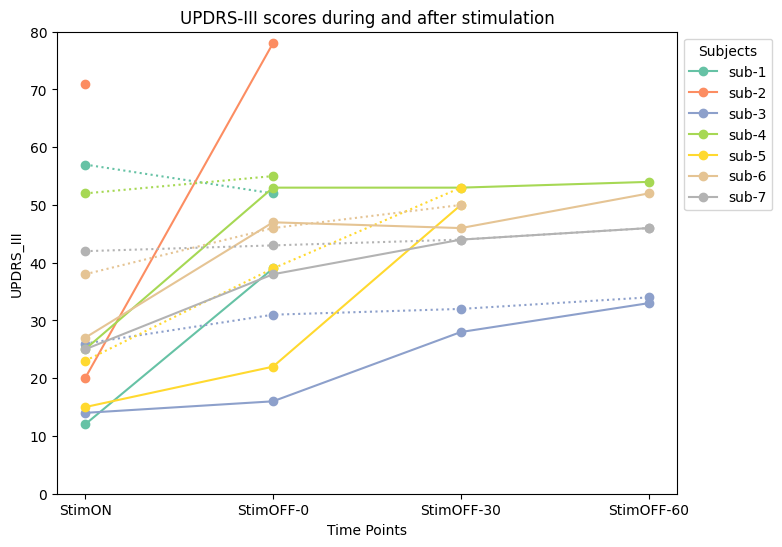

In [17]:
plot = updrs_analysis.lineplot_absolute_updrsiii(
    sub_list=["084", "080", "075", "086", "087", "088", "089"],
    subscore="total",
)

#sub_list=["084", "080", "075", "086", "087", "088", "089"],

### LINEPLOT Relative to StimOnA

Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_086.x

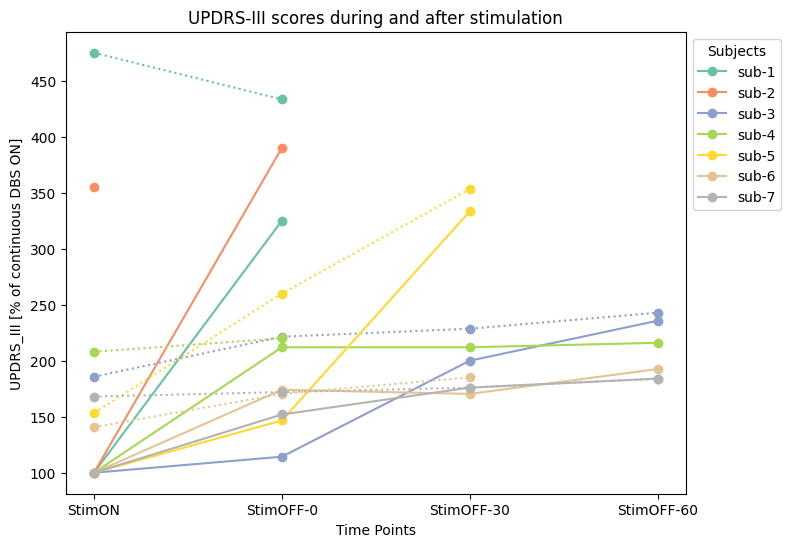

In [22]:
rel_lineplot = updrs_analysis.lineplot_normalized_to_StimOnA_updrsiii(
    sub_list=["084", "080", "075", "086", "087", "088", "089"],
    subscore="total",
)

### Barplot

Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_086.x

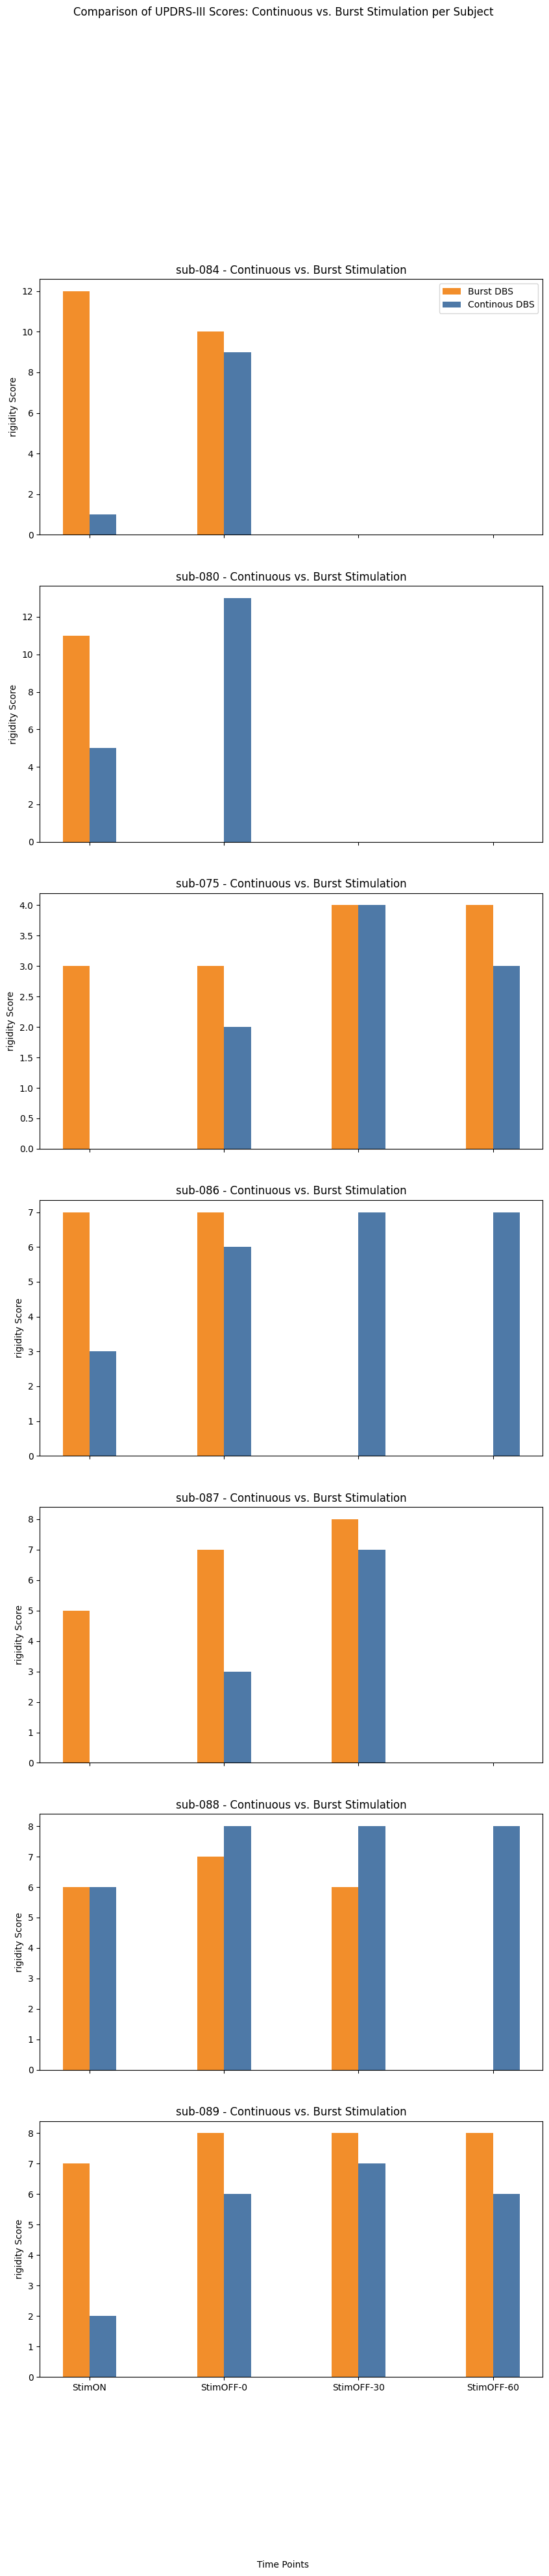

In [37]:
barplot = updrs_analysis.barplot_absolute_updrsiii(
    sub_list=["084", "080", "075", "086", "087", "088", "089"],
    subscore="rigidity",
)

### Group Analysis cDBS vs burst DBS vs Stim OFF (last available StimOFF score after cDBS)

In [74]:
subjects = ["084", "080", "075", "086", "087", "088", "089"]

updrs_scores = updrs_analysis.group_updrs_scores(sub_list=subjects, stimulation="continuous")


Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_086.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-086
Excel file loaded successfully: metadata_087.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-087
Excel file loaded successfully: metadata_088.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-088
Excel file loaded successfully: metadata_089.x

In [75]:
extracted_updrs = updrs_analysis.extract_data_for_bar_and_line_plot(subscore="total")


Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_086.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-086
Excel file loaded successfully: metadata_087.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-087
Excel file loaded successfully: metadata_088.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-088
Excel file loaded successfully: metadata_089.x

In [76]:
extracted_updrs[0]

,subject,stimulation,score
0,sub-1,continuous,12.0
1,sub-2,continuous,20.0
2,sub-3,continuous,14.0
3,sub-4,continuous,25.0
4,sub-5,continuous,15.0
5,sub-6,continuous,27.0
6,sub-7,continuous,25.0
7,sub-1,burst,57.0
8,sub-2,burst,71.0
9,sub-3,burst,26.0


In [77]:
extracted_updrs[1]

,subject,StimOFFA_run
0,084,run-1
1,080,run-1
2,075,run-3
3,086,run-3
4,087,run-2
5,088,run-3
6,089,run-3


Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_086.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-086
Excel file loaded successfully: metadata_087.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-087
Excel file loaded successfully: metadata_088.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-088
Excel file loaded successfully: metadata_089.x

/Users/jenniferbehnke/code/Patterned_stimulation_project/patterned_DBS/src/patterned_DBS/data_processing/updrs_analysis.py:494: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


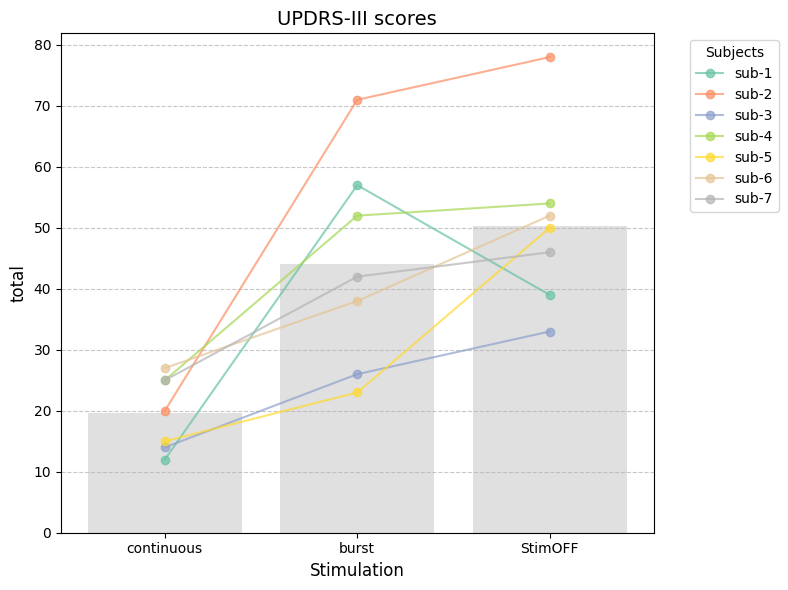

In [80]:
plot = updrs_analysis.plot_bar_line_group_plot(subscore="total")

Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_086.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-086
Excel file loaded successfully: metadata_087.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-087
Excel file loaded successfully: metadata_088.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-088
Excel file loaded successfully: metadata_089.x

/Users/jenniferbehnke/anaconda3/envs/burst_dbs/lib/python3.12/site-packages/scipy/stats/_wilcoxon.py:199: UserWarning: Sample size too small for normal approximation.
  temp = _wilcoxon_iv(x, y, zero_method, correction, alternative, method, axis)
/Users/jenniferbehnke/code/Patterned_stimulation_project/patterned_DBS/src/patterned_DBS/data_processing/updrs_analysis.py:668: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  print(


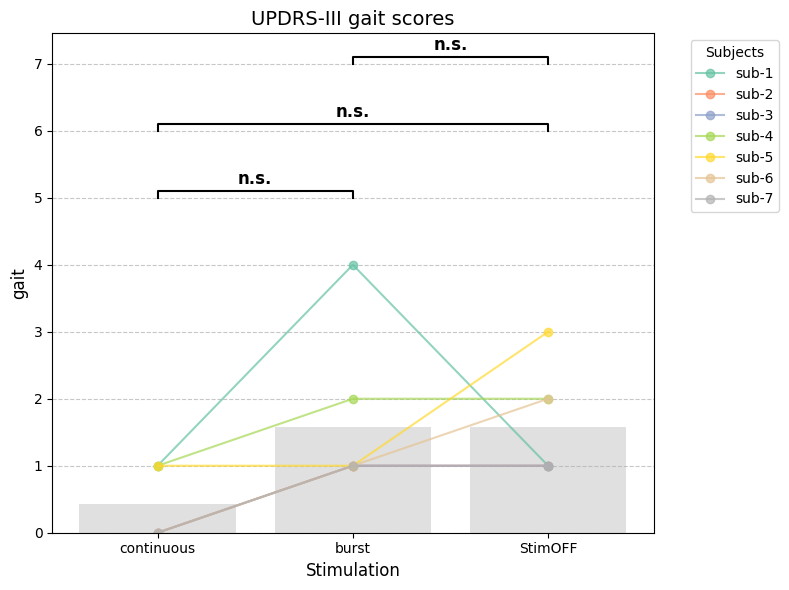

In [55]:
plot_with_statistics = updrs_analysis.plot_bar_line_group_plot_with_statistics(subscore="gait")

## Statistics UPDRS-III
- UPDRS-III: total, bradykinesia, rigidity, tremor, gait subscores
- paired tests: rmANOVA or Friedmann 
- comparison of 3 stimulation conditions: continuous, burst, StimOFF within subjects

In [42]:
extracted_updrs = updrs_analysis.extract_data_for_bar_and_line_plot(subscore="total")


Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_086.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-086
Excel file loaded successfully: metadata_087.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-087
Excel file loaded successfully: metadata_088.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-088
Excel file loaded successfully: metadata_089.x

In [14]:
extracted_updrs[0].keys()

Index(['subject', 'stimulation', 'score'], dtype='object')

In [35]:
extracted_updrs[1]

,subject,StimOFFA_run
0,084,run-1
1,080,run-1
2,075,run-3
3,086,run-3
4,087,run-2
5,088,run-3
6,089,run-3


In [5]:
data = extracted_updrs[0]

pivot_data = data.pivot(index="subject", columns="stimulation", values="score")
pivot_data

stimulation,StimOFF,burst,continuous
subject,,,
sub-1,39.0,57.0,12.0
sub-2,78.0,71.0,20.0
sub-3,33.0,26.0,14.0
sub-4,54.0,52.0,25.0
sub-5,50.0,23.0,15.0
sub-6,52.0,38.0,27.0
sub-7,46.0,42.0,25.0


In [60]:
result = updrs_analysis.perform_paired_analysis(subscore="tremor")

Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_086.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-086
Excel file loaded successfully: metadata_087.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-087
Excel file loaded successfully: metadata_088.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-088
Excel file loaded successfully: metadata_089.x

In [45]:
result[0] # total

,stimulation,mean,std,median,min,max,normality_pvalue,Test,statistic,p_value,Comparison
0,StimOFF,50.285714,14.314495,50.0,33.0,78.0,0.389762,NaN,NaN,NaN,NaN
1,burst,44.142857,17.160309,42.0,23.0,71.0,0.855295,NaN,NaN,NaN,NaN
2,continuous,19.714286,6.102302,20.0,12.0,27.0,0.267906,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ANOVA,16.716771,0.000339,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paired t-test,-3.735976,0.009668,continuous vs burst
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paired t-test,-6.132670,0.000860,continuous vs StimOFF
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paired t-test,-1.198769,0.275811,burst vs StimOFF
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Holm Correction,NaN,0.019336,continuous vs burst
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bonferroni Correction,NaN,0.029005,continuous vs burst
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Holm Correction,NaN,0.002579,continuous vs StimOFF


In [57]:
result[0] # bradykinesia

,stimulation,mean,std,median,min,max,normality_pvalue,Test,statistic,p_value,Comparison
0,StimOFF,22.000000,4.434712,21.0,17.0,29.0,0.505903,NaN,NaN,NaN,NaN
1,burst,18.714286,6.993194,18.0,7.0,29.0,0.979870,NaN,NaN,NaN,NaN
2,continuous,9.857143,3.976119,8.0,6.0,15.0,0.081941,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ANOVA,18.858537,0.000198,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paired t-test,-3.425118,0.014055,continuous vs burst
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paired t-test,-6.584072,0.000589,continuous vs StimOFF
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paired t-test,-2.093795,0.081171,burst vs StimOFF
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Holm Correction,NaN,0.028110,continuous vs burst
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bonferroni Correction,NaN,0.042165,continuous vs burst
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Holm Correction,NaN,0.001768,continuous vs StimOFF


In [59]:
result[0] # rigidity

,stimulation,mean,std,median,min,max,normality_pvalue,Test,statistic,p_value,Comparison
0,StimOFF,7.571429,3.047247,7.0,3.0,13.0,0.744061,NaN,NaN,NaN,NaN
1,burst,7.285714,3.199702,7.0,3.0,12.0,0.569618,NaN,NaN,NaN,NaN
2,continuous,2.428571,2.370453,2.0,0.0,6.0,0.389195,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ANOVA,16.821918,0.000330,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paired t-test,-3.849742,0.008463,continuous vs burst
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paired t-test,-5.489949,0.001529,continuous vs StimOFF
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paired t-test,-0.400000,0.703008,burst vs StimOFF
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Holm Correction,NaN,0.016925,continuous vs burst
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bonferroni Correction,NaN,0.025388,continuous vs burst
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Holm Correction,NaN,0.004587,continuous vs StimOFF


In [61]:
result[0] # tremor

,stimulation,mean,std,median,min,max,normality_pvalue,Test,statistic,p_value,Comparison
0,StimOFF,7.571429,6.948792,9.0,0.0,20.0,0.351499,NaN,NaN,NaN,NaN
1,burst,5.857143,4.980916,4.0,0.0,15.0,0.502774,NaN,NaN,NaN,NaN
2,continuous,1.142857,0.899735,1.0,0.0,2.0,0.061550,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ANOVA,6.063275,0.015140,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paired t-test,-2.587406,0.041356,continuous vs burst
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paired t-test,-2.518201,0.045397,continuous vs StimOFF
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paired t-test,-1.613199,0.157828,burst vs StimOFF
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Holm Correction,NaN,0.124067,continuous vs burst
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bonferroni Correction,NaN,0.124067,continuous vs burst
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Holm Correction,NaN,0.124067,continuous vs StimOFF


## Gait tasks

### Load gait sheets

In [16]:
gait_data = gait_analysis.load_gait_task_results(sub="084", stimulation="continuous", task="10m_walk")

Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084


In [42]:
gait_data[0]

,medication,stimulation,run,task,time,steps,turning_steps,comment
4,on,StimOnA,1,10m_walk,00:14:85,33.0,5.0,NaN
6,on,StimOffA,1,10m_walk,00:24:05,46.0,5.0,NaN


In [53]:
group_data = gait_analysis.group_gait_task_results(sub_list=["084", "080", "075", "086", "087", "088", "089"], 
                                                   stimulation="burst",
                                                   task="10m_walk")

Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_086.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-086
Excel file loaded successfully: metadata_087.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-087
Excel file loaded successfully: metadata_088.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-088
Excel file loaded successfully: metadata_089.x

/Users/jenniferbehnke/code/Patterned_stimulation_project/patterned_DBS/src/patterned_DBS/data_processing/gait_analysis.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_scores[sub] = sub
/Users/jenniferbehnke/code/Patterned_stimulation_project/patterned_DBS/src/patterned_DBS/data_processing/gait_analysis.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subscore_data[sub] = sub
/Users/jenniferbehnke/code/Patterned_stimulation_project/patterned_DBS/src/patterned_DBS/data_processing/gait_analysis.py

In [54]:
group_data

,medication,stimulation,run,task,time,steps,turning_steps,comment,subject
0,on,StimOnB,1,10m_walk,03:53:00,NaN,NaN,"shuffling, freezing",084
2,on,StimOffB,1,10m_walk,canceled,NaN,NaN,"patient was too tired, incapable of walking more",084
4,on,StimOnB,1,10m_walk,00:15:69,35.0,4.0,NaN,080
6,on,StimOffB,1,10m_walk,NaN,NaN,NaN,"canceled recording, was too exhausted after bu...",080
8,on,StimOnB,1,10m_walk,00:18:77 min,35.0,4.0,NaN,075
10,on,StimOffB,1,10m_walk,00:20:17 min,37.0,4.0,NaN,075
12,on,StimOffB,2,10m_walk,00:19:21 min,36.0,4.0,NaN,075
14,on,StimOffB,3,10m_walk,00:18:37 min,35.0,4.0,NaN,075
8,on,StimOnB,1,10m_walk,00:17:20 min,32.0,3.0,NaN,086
10,on,StimOffB,1,10m_walk,00:17:32 min,31.0,3.0,NaN,086


In [56]:
extract_data_to_plot = gait_analysis.extract_data_for_bar_and_line_plot(task="10m_walk", subscore_column="time")

Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_086.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-086
Excel file loaded successfully: metadata_087.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-087
Excel file loaded successfully: metadata_088.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-088
Excel file loaded successfully: metadata_089.x

In [57]:
extract_data_to_plot[0]

,subject,stimulation,score
0,sub-1,continuous,14.085
1,sub-2,continuous,16.007
2,sub-3,continuous,14.081
3,sub-4,continuous,16.052
4,sub-5,continuous,13.076
5,sub-6,continuous,20.007
6,sub-7,continuous,15.018
7,sub-1,burst,233.000
8,sub-2,burst,15.069
9,sub-3,burst,18.077


In [46]:
extract_data_to_plot[1]

,subject,StimOFFA_run
0,084,run-1
1,080,run-1
2,075,run-3
3,086,run-3
4,087,run-2
5,088,run-3
6,089,run-3


### Plot bar and line plot

Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_086.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-086
Excel file loaded successfully: metadata_087.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-087
Excel file loaded successfully: metadata_088.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-088
Excel file loaded successfully: metadata_089.x

/Users/jenniferbehnke/code/Patterned_stimulation_project/patterned_DBS/src/patterned_DBS/data_processing/gait_analysis.py:361: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


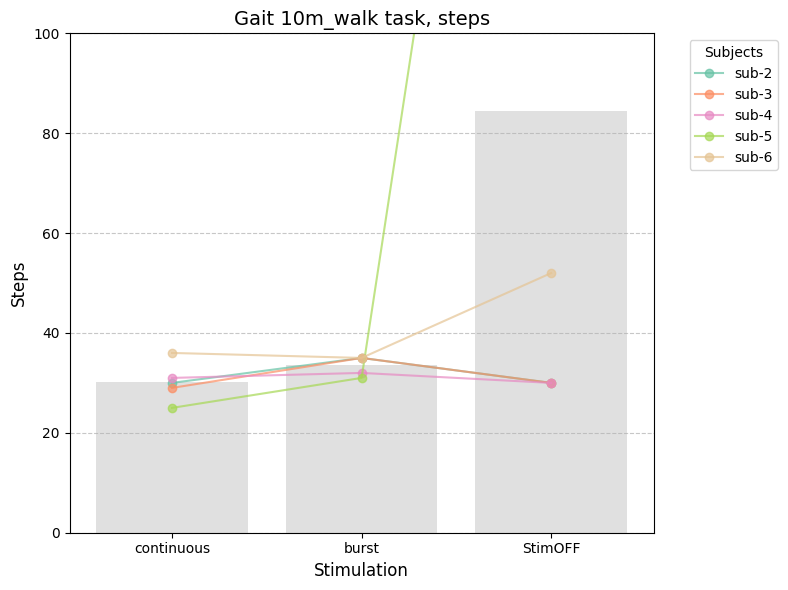

In [17]:
# timed_up_and_go: fix canceled, check if present otherwise exclude
# steps, check if present otherwise exclude

plot_gait = gait_analysis.plot_bar_line_group_plot_with_statistics(task="10m_walk", subscore_column="steps")



In [ ]:
statistics_and_plot = gait_analysis.perform_paired_analysis(task="10m_walk", subscore_column="time")

Excel file loaded successfully: metadata_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Excel file loaded successfully: metadata_080.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-080
Excel file loaded successfully: metadata_075.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-075
Excel file loaded successfully: metadata_086.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-086
Excel file loaded successfully: metadata_087.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-087
Excel file loaded successfully: metadata_088.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-088
Excel file loaded successfully: metadata_089.x

In [15]:
statistics_and_plot[0]

,stimulation,mean,std,median,min,max,normality_pvalue,Test,statistic,p_value
0,StimOFF,71.000000,92.529275,33.0,30.0,280.0,0.000033,NaN,NaN,NaN
1,burst,33.166667,2.041241,33.5,31.0,35.0,NaN,NaN,NaN,NaN
2,continuous,30.428571,3.457222,30.0,25.0,36.0,0.911642,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friedman,NaN,NaN


## Gait sub-084

Excel file loaded successfully: gait_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084


/Users/jenniferbehnke/code/Patterned_stimulation_project/patterned_DBS/src/patterned_DBS/data_processing/case_sub084.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  x="x_category",


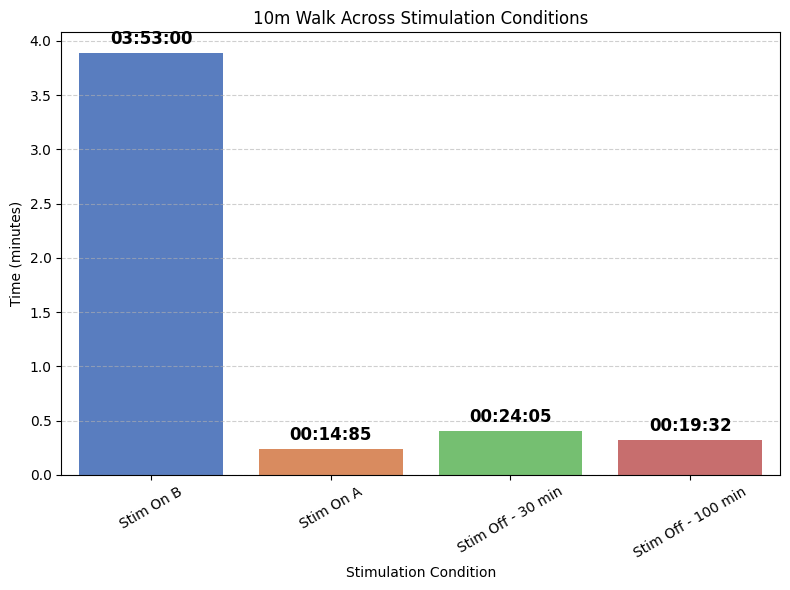

Figures barplot_10m_walk.svg and barplot_10m_walk.png 
were written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/figures/sub-084.


In [44]:
gait_plot = case_sub084.plot_10m_walk()

## Ziegler test

In [7]:
gait_sheet = gait_analysis.load_gait_only_scores(sub="084", stimulation="continuous", sheet="ziegler_times")

Excel file loaded successfully: gait_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084


In [8]:
gait_sheet[1]

,blinded,stimulation,run,task_level,interval,start,end,time
0,Ziegler_1,StimOffA,1,walking,standup,7.148,8.669,1.521
1,Ziegler_1,StimOffA,1,walking,turning_cw,12.211,23.190,10.979
2,Ziegler_1,StimOffA,1,walking,turning_ccw,23.190,30.627,7.437
3,Ziegler_1,StimOffA,1,walking,total_turn,12.211,30.627,18.416
4,Ziegler_1,StimOffA,1,walking,door_passage,30.627,41.919,11.292
...,...,...,...,...,...,...,...,...
67,Ziegler_3,StimOffA,2,carrying,door_passage,107.252,118.836,11.584
68,Ziegler_3,StimOffA,2,carrying,corridor_turn,118.836,122.606,3.770
69,Ziegler_3,StimOffA,2,carrying,way_back,122.606,128.961,6.355
70,Ziegler_3,StimOffA,2,carrying,sitting_turn,128.961,132.836,3.875


Excel file loaded successfully: gait_084.xlsx 
loaded from: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/data/sub-084
Figures barplot_ziegler_times_sub_084.svg and barplot_ziegler_times_sub_084.png 
were written in: /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Patterned_stimulation_project/figures/sub-084.


/Users/jenniferbehnke/code/Patterned_stimulation_project/patterned_DBS/src/patterned_DBS/data_processing/case_sub084.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Drop any NaN values (if any rows don't match the conditions)
/Users/jenniferbehnke/code/Patterned_stimulation_project/patterned_DBS/src/patterned_DBS/data_processing/case_sub084.py:163: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  # Styling


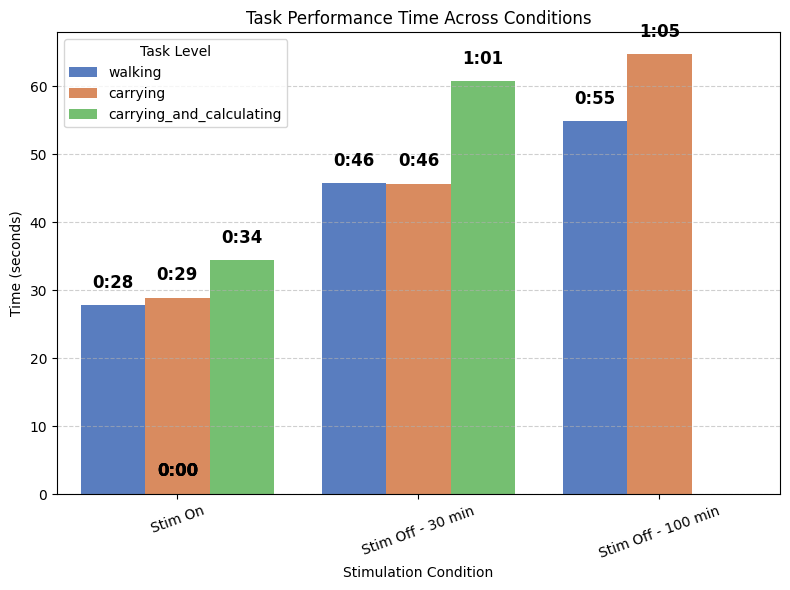

In [47]:
plot_ziegler = case_sub084.plot_ziegler_result(result="times")

In [48]:
ax = plot_ziegler[0]
df_filtered = plot_ziegler[1]
df_filtered

,blinded,stimulation,run,task_level,interval,start,end,time,x_category,time_display
8,Ziegler_1,StimOffA,1,walking,total_time,7.148,52.856,45.708,Stim Off - 30 min,0:46
17,Ziegler_1,StimOffA,1,carrying,total_time,59.690,105.377,45.687,Stim Off - 30 min,0:46
26,Ziegler_1,StimOffA,1,carrying_and_calculating,total_time,109.981,170.731,60.750,Stim Off - 30 min,1:01
35,Ziegler_2,StimOnA,1,walking,total_time,1.586,29.356,27.770,Stim On,0:28
44,Ziegler_2,StimOnA,1,carrying,total_time,33.627,62.523,28.896,Stim On,0:29
53,Ziegler_2,StimOnA,1,carrying_and_calculating,total_time,66.211,100.627,34.416,Stim On,0:34
62,Ziegler_3,StimOffA,2,walking,total_time,3.440,58.315,54.875,Stim Off - 100 min,0:55
71,Ziegler_3,StimOffA,2,carrying,total_time,68.127,132.836,64.709,Stim Off - 100 min,1:05
